# Libraries used in project

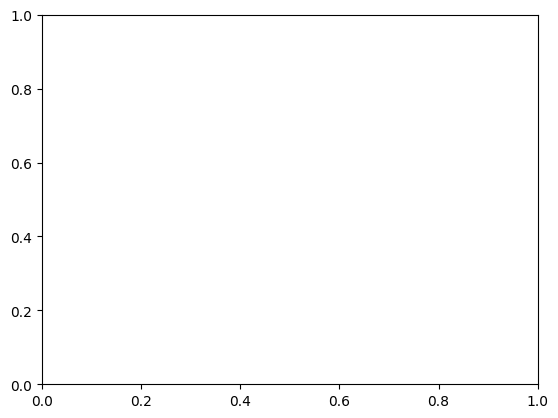

In [32]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
fig, ax = plt.subplots()
import plotly.express as px
import io
import plotly.io as pio
import matplotlib.ticker as ticker
import folium
#!pip install geopandas
import geopandas

# Data Preprocessing

## Importing all the excel files

In [33]:
#loading Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [34]:
# importing all the excel files required for analysis using for loop
project_dir = '/content/drive/MyDrive/Project/DataSets/'
files = os.listdir(project_dir)
files_xls = [f for f in files if f[-3:] == 'xls']
files_xls

os.chdir('/content/drive/MyDrive/Project/DataSets/')


In [35]:
from pandas.io.formats.style_render import Sequence
#Initialize empty dataframe:
world_economy = pd.DataFrame()
#Loop over list of files to append to empty dataframe:
for f in files_xls:
    data = pd.read_excel(f,'Data', skiprows= 3)
    world_economy = world_economy.append(data)
    

<ipython-input-35-5c54e526c0e2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_economy = world_economy.append(data)
<ipython-input-35-5c54e526c0e2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_economy = world_economy.append(data)
<ipython-input-35-5c54e526c0e2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_economy = world_economy.append(data)
<ipython-input-35-5c54e526c0e2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  world_economy = world_economy.append(data)
<ipython-input-35-5c54e526c0e2>:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pan

## Renaming columns and filtering for countries

In [36]:
# Renamed Columns
world_economy.rename(
    columns={"Country Name": "Country_Name", "Country Code": "Country_Code", "Indicator Name": "Indicator_Name", "Indicator Code":"Indicator_Code"},
    inplace=True,
)
#Filtering for countries: US, China, UK, India, Germany, 
country_filter = ['USA', 'CHN', 'IND', 'GBR','JPN','DEU']
world_economy = world_economy[world_economy.Country_Code.isin(country_filter)]
#world_economy

In [37]:
#Initial dataset selecting only required columns
world_economy1 = pd.concat([world_economy.iloc[:,:3],world_economy.iloc[:,-32:]],axis=1)
world_economy1


,Country_Name,Country_Code,Indicator_Name,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
40,China,CHN,GDP (current US$),3.608579e+11,3.833733e+11,4.269157e+11,4.447313e+11,5.643247e+11,7.345479e+11,8.637467e+11,...,8.532230e+12,9.570406e+12,1.047568e+13,1.106155e+13,1.123328e+13,1.231041e+13,1.389482e+13,1.427994e+13,1.468767e+13,1.773406e+13
55,Germany,DEU,GDP (current US$),1.771671e+12,1.868945e+12,2.131572e+12,2.071324e+12,2.205074e+12,2.585792e+12,2.497245e+12,...,3.527143e+12,3.733805e+12,3.889093e+12,3.357586e+12,3.469853e+12,3.690849e+12,3.974443e+12,3.888226e+12,3.889669e+12,4.259935e+12
81,United Kingdom,GBR,GDP (current US$),1.093169e+12,1.142797e+12,1.179660e+12,1.061389e+12,1.140490e+12,1.346184e+12,1.421619e+12,...,2.706341e+12,2.786315e+12,3.065223e+12,2.934858e+12,2.699660e+12,2.683399e+12,2.878152e+12,2.857058e+12,2.704609e+12,3.131378e+12
109,India,IND,GDP (current US$),3.209790e+11,2.701053e+11,2.882084e+11,2.792960e+11,3.272756e+11,3.602820e+11,3.928971e+11,...,1.827638e+12,1.856722e+12,2.039127e+12,2.103588e+12,2.294798e+12,2.651473e+12,2.702930e+12,2.831552e+12,2.667688e+12,3.176295e+12
119,Japan,JPN,GDP (current US$),3.132818e+12,3.584420e+12,3.908809e+12,4.454144e+12,4.998798e+12,5.545564e+12,4.923392e+12,...,6.272363e+12,5.212328e+12,4.896994e+12,4.444931e+12,5.003678e+12,4.930837e+12,5.037835e+12,5.123318e+12,5.040108e+12,4.940878e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55,Germany,DEU,"Industry (including construction), value added...",NaN,6.265480e+11,6.930996e+11,6.339595e+11,6.658660e+11,7.697407e+11,7.206031e+11,...,9.623453e+11,1.000010e+12,1.050483e+12,9.102344e+11,9.565868e+11,1.013593e+12,1.085272e+12,1.048042e+12,1.035473e+12,1.138958e+12
81,United Kingdom,GBR,"Industry (including construction), value added...",2.989374e+11,3.045335e+11,3.097958e+11,2.725991e+11,2.989063e+11,3.266846e+11,3.469126e+11,...,4.941023e+11,5.174166e+11,5.569648e+11,5.280932e+11,4.720007e+11,4.755595e+11,5.111731e+11,5.046773e+11,4.595554e+11,5.475316e+11
109,India,IND,"Industry (including construction), value added...",8.812060e+10,7.142050e+10,7.721894e+10,7.479982e+10,9.042036e+10,1.030400e+11,1.096665e+11,...,5.372986e+11,5.274001e+11,5.639493e+11,5.752764e+11,6.108523e+11,7.026408e+11,7.139003e+11,6.964615e+11,6.544123e+11,8.222613e+11
119,Japan,JPN,"Industry (including construction), value added...",NaN,NaN,NaN,NaN,1.727278e+12,1.903040e+12,1.688032e+12,...,1.666105e+12,1.389124e+12,1.337547e+12,1.270526e+12,1.432550e+12,1.424145e+12,1.459949e+12,1.466410e+12,1.462480e+12,NaN


In [38]:
# Transposed year from column to row
world_economy2 = pd.melt(world_economy1, id_vars=['Country_Name','Country_Code','Indicator_Name'], 
value_vars= world_economy1[1990:2020], value_name="Values",var_name = "Year")
world_economy2


,Country_Name,Country_Code,Indicator_Name,Year,Values
0,China,CHN,GDP (current US$),1990,3.608579e+11
1,Germany,DEU,GDP (current US$),1990,1.771671e+12
2,United Kingdom,GBR,GDP (current US$),1990,1.093169e+12
3,India,IND,GDP (current US$),1990,3.209790e+11
4,Japan,JPN,GDP (current US$),1990,3.132818e+12
...,...,...,...,...,...
2875,Germany,DEU,"Industry (including construction), value added...",2021,1.138958e+12
2876,United Kingdom,GBR,"Industry (including construction), value added...",2021,5.475316e+11
2877,India,IND,"Industry (including construction), value added...",2021,8.222613e+11
2878,Japan,JPN,"Industry (including construction), value added...",2021,NaN


In [39]:
# Transposed metrics/indicators from row to column
world_economy3= world_economy2.pivot(index= ['Country_Name','Country_Code','Year'],columns='Indicator_Name', 
               values='Values')
world_economy4 = world_economy3.reset_index(level=['Country_Name', 'Country_Code','Year'])
world_economy4

Indicator_Name,Country_Name,Country_Code,Year,"Agriculture, forestry, and fishing, value added (% of GDP)",Expense (% of GDP),Exports of goods and services (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross fixed capital formation (% of GDP),Imports of goods and services (% of GDP),"Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Revenue, excluding grants (% of GDP)","Services, value added (% of GDP)","Services, value added (annual % growth)"
0,China,CHN,1990,26.584308,NaN,12.451603,0.966308,3.487000e+09,3.608579e+11,317.884673,23.988754,9.747871,1.480705e+11,3.052290,NaN,NaN,32.382773,2.668735
1,China,CHN,1991,24.034067,NaN,13.436371,1.138838,4.366000e+09,3.833733e+11,333.142145,25.703799,10.629964,1.590516e+11,3.556686,NaN,NaN,34.478537,9.204204
2,China,CHN,1992,21.328861,NaN,13.555544,2.613162,1.115600e+10,4.269157e+11,366.460692,30.347320,12.542033,1.840661e+11,6.353981,NaN,NaN,35.555806,12.600329
3,China,CHN,1993,19.307468,NaN,11.997883,6.186882,2.751500e+10,4.447313e+11,377.389839,37.092233,13.902547,2.053615e+11,14.610079,NaN,NaN,34.515996,12.169955
4,China,CHN,1994,19.474283,NaN,18.536749,5.987156,3.378700e+10,5.643247e+11,473.492279,34.440616,17.233066,2.605095e+11,24.256990,NaN,NaN,34.362656,11.368380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
187,United States,USA,2017,0.946869,22.311172,12.261738,1.955211,3.808230e+11,1.947734e+13,59907.754261,20.648162,15.017423,3.590730e+12,2.130110,11.258856,19.535524,77.032939,2.015631
188,United States,USA,2018,0.903901,22.320573,12.360989,1.045704,2.147150e+11,2.053306e+13,62823.309438,20.918142,15.249390,3.825493e+12,2.442583,11.348074,17.511140,76.735539,2.840502
189,United States,USA,2019,0.838813,22.726136,11.872470,1.472075,3.147440e+11,2.138098e+13,65120.394663,20.978794,14.579479,3.908534e+12,1.812210,11.058037,17.459388,77.181114,2.352841
190,United States,USA,2020,0.948847,32.194915,10.202126,0.707069,1.489120e+11,2.106047e+13,63530.633484,21.316016,13.181636,3.687358e+12,1.233584,10.629065,17.558883,78.137486,-2.396564


# Exploratory Data Analysis

## Data Type validation

In [ ]:
#checking the datatypes of columns
world_economy4.dtypes

Indicator_Name
Country_Name                                                     object
Country_Code                                                     object
Year                                                             object
Agriculture, forestry, and fishing, value added (% of GDP)      float64
Expense (% of GDP)                                              float64
Exports of goods and services (% of GDP)                        float64
Foreign direct investment, net inflows (% of GDP)               float64
Foreign direct investment, net inflows (BoP, current US$)       float64
GDP (current US$)                                               float64
GDP per capita (current US$)                                    float64
Gross fixed capital formation (% of GDP)                        float64
Imports of goods and services (% of GDP)                        float64
Industry (including construction), value added (current US$)    float64
Inflation, consumer prices (annual %)            

In [ ]:
#Numerical and Categorical variables
num_vars = world_economy4.columns[world_economy4.dtypes != 'object']
cat_vars = world_economy4.columns[world_economy4.dtypes == 'object']



## Checking Null values in data

In [ ]:
print(world_economy4[num_vars].isnull().sum().sort_values(ascending = False))

Indicator_Name
Revenue, excluding grants (% of GDP)                            51
Expense (% of GDP)                                              42
Manufacturing, value added (% of GDP)                           27
Services, value added (annual % growth)                         17
Agriculture, forestry, and fishing, value added (% of GDP)      13
Industry (including construction), value added (current US$)    13
Services, value added (% of GDP)                                13
Exports of goods and services (% of GDP)                         0
Foreign direct investment, net inflows (% of GDP)                0
Foreign direct investment, net inflows (BoP, current US$)        0
GDP (current US$)                                                0
GDP per capita (current US$)                                     0
Gross fixed capital formation (% of GDP)                         0
Imports of goods and services (% of GDP)                         0
Inflation, consumer prices (annual %)          

## Data Statistics

In [ ]:
world_economy4.describe()

Indicator_Name,"Agriculture, forestry, and fishing, value added (% of GDP)",Expense (% of GDP),Exports of goods and services (% of GDP),"Foreign direct investment, net inflows (% of GDP)","Foreign direct investment, net inflows (BoP, current US$)",GDP (current US$),GDP per capita (current US$),Gross fixed capital formation (% of GDP),Imports of goods and services (% of GDP),"Industry (including construction), value added (current US$)","Inflation, consumer prices (annual %)","Manufacturing, value added (% of GDP)","Revenue, excluding grants (% of GDP)","Services, value added (% of GDP)","Services, value added (annual % growth)"
count,179.000000,150.000000,192.000000,192.000000,1.920000e+02,1.920000e+02,192.000000,192.000000,192.000000,1.790000e+02,192.000000,165.000000,141.000000,179.000000,175.000000
mean,6.571068,24.689994,21.005112,2.038204,8.823735e+10,4.968498e+12,26346.431608,25.680788,20.867614,1.320310e+12,3.060069,17.808605,22.001936,59.362508,4.095516
std,8.297668,8.937880,10.193178,2.130555,1.069596e+11,5.011566e+12,19024.543191,7.360650,8.717815,1.319207e+12,3.450125,5.926413,8.307473,13.182540,4.100975
min,0.545711,14.003794,7.053350,-0.870539,-2.505544e+10,2.701053e+11,301.501195,15.636479,6.936003,7.142050e+10,-1.401473,8.707091,9.625041,32.382773,-12.447069
25%,0.939689,16.173880,12.195774,0.604844,1.192047e+10,1.782301e+12,2217.250165,20.120594,13.903402,4.697863e+11,1.220927,13.452878,13.316790,46.143015,1.591804
50%,1.150507,22.411282,19.538772,1.648616,4.459292e+10,3.112099e+12,30023.686381,23.720703,19.024383,7.502424e+11,2.210078,16.864568,19.415907,62.931742,2.847274
75%,13.109068,31.780396,26.176948,2.623657,1.264920e+11,5.353511e+12,41374.861615,30.147008,26.856839,1.648114e+12,3.785935,20.619770,29.841884,70.257099,7.704568
max,27.662705,47.557208,47.308859,12.731504,5.114340e+11,2.331508e+13,70248.629000,44.518766,41.712223,6.991851e+12,24.256990,32.452328,38.116425,78.137486,16.071495


## Data Shape

In [ ]:
world_economy4.shape

(192, 18)

# Data Visualisations


## Top 11 Economies of the world

In [ ]:
#To read the coordintes 
world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))

world.head()

#Subsetting the required data
df1 = world_economy4.pivot_table(index='Country_Code',columns=['Year'],values='GDP (current US$)')[['2021']]
df1.reset_index()
#Merging with coordinated on top of country code
table = world.merge(df1, how="left", left_on=['iso_a3'], right_on=['Country_Code'])
table = table.dropna(subset=['2021'])

table['GDP2021'] = table['2021']/1000000000000
table

,pop_est,continent,name,iso_a3,gdp_md_est,geometry,2021,GDP2021
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000...",2.331508e+13,23.315081
98,1.366418e+09,Asia,India,IND,2868929,"POLYGON ((97.32711 28.26158, 97.40256 27.88254...",3.176295e+12,3.176295
121,8.313280e+07,Europe,Germany,DEU,3861123,"POLYGON ((14.11969 53.75703, 14.35332 53.24817...",4.259935e+12,4.259935
139,1.397715e+09,Asia,China,CHN,14342903,"MULTIPOLYGON (((109.47521 18.19770, 108.65521 ...",1.773406e+13,17.734063
143,6.683440e+07,Europe,United Kingdom,GBR,2829108,"MULTIPOLYGON (((-6.19788 53.86757, -6.95373 54...",3.131378e+12,3.131378
155,1.262649e+08,Asia,Japan,JPN,5081769,"MULTIPOLYGON (((141.88460 39.18086, 140.95949 ...",4.940878e+12,4.940878


In [ ]:
my_map = folium.Map(tiles='cartodbpositron',location=(30, 10), zoom_start=3)
# Add the data
folium.Choropleth(
    geo_data=table,
    name='choropleth',
    data=table,
    columns=['name', 'GDP2021'],
    key_on='feature.properties.name',
    fill_color='RdYlGn',
    fill_opacity=0.7,
    line_opacity=0.1,
    legend_name='GDP in Trillion (US$)',
    line_color="black"
).add_to(my_map)
my_map.save('GDP4.html')

## Trend Analysis of GDP of the major economies from 1990-2021

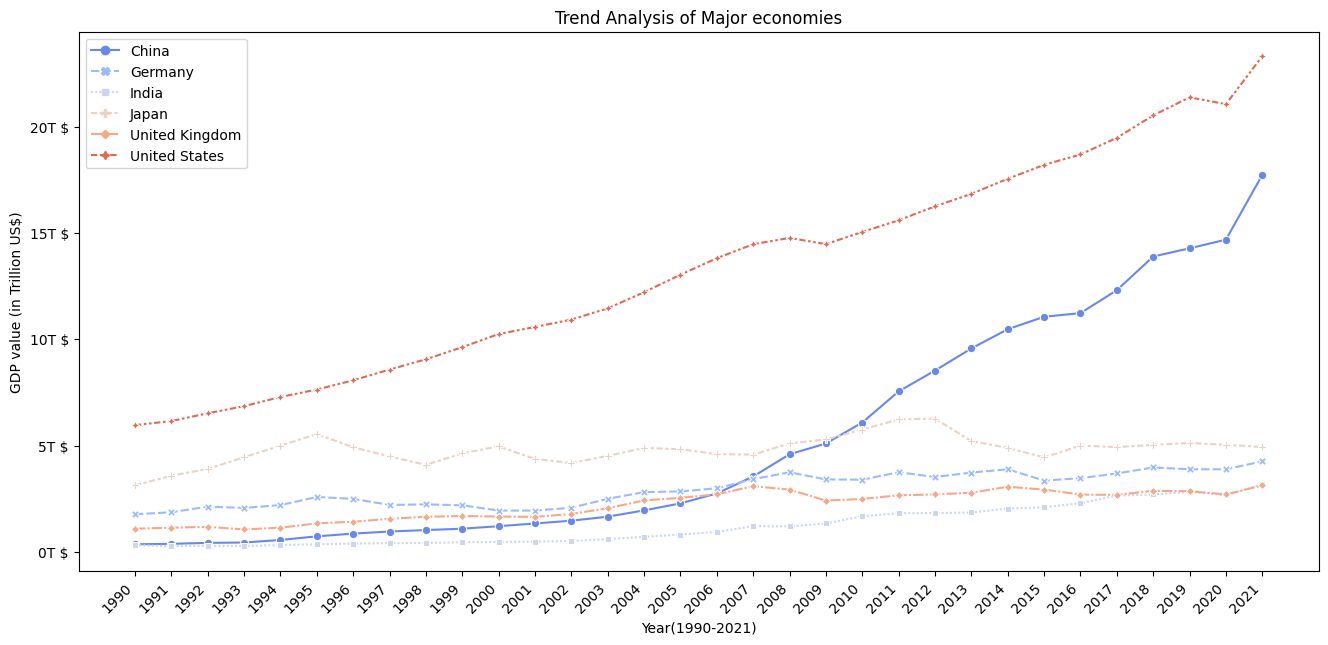

In [49]:

plt.figure(figsize=(16,7))
g = sns.lineplot( x = "Year" ,y = "GDP (current US$)",
                data = world_economy4, hue ="Country_Name",style ="Country_Name", markers = True
                )
#pd.melt(df, 'Day')
plt.xticks(rotation= 45, ha='right', fontsize=10)
g.set(xlabel="Year(1990-2021)", ylabel="GDP value (in Trillion US$)", title="Trend Analysis of Major economies")
g.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x,pos:'{:.0f}T $'.format(x/1e12)))
g.yaxis.offsetText.set_visible(False)
#plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.legend(loc='upper left')
plt.show()
#plt.savefig('GDP.png')
#files.download("GDP.png") 

## Pattern of Foreign Direct Investments (FDI)  % to GDP of major economies

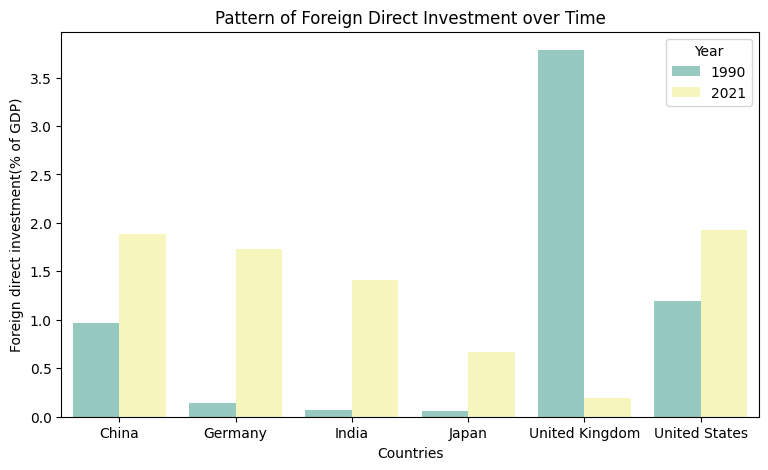

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create a filtered DataFrame containing only the data for years 1990 and 2021
filtered_data = world_economy4[(world_economy4['Year'] == '1990') |(world_economy4['Year'] == '2021')]

# Create the bar plot using the filtered DataFrame
fig, ax = plt.subplots(figsize = (9, 5))
sns.barplot(data = filtered_data, x = 'Country_Name', y = 'Foreign direct investment, net inflows (% of GDP)', hue = 'Year', palette = "Set3")

# Add title and axis labels
ax.set(xlabel='Countries', ylabel='Foreign direct investment(% of GDP)', title='Pattern of Foreign Direct Investment over Time')
plt.show()
plt.savefig("FDI.png")

# Download the file
from google.colab import files
files.download("FDI.png")


## Analysis on Which sector is having the major contribution to India’s GDP

In [ ]:
# Create a filtered DataFrame containing only the data for various sectors in India
filtered_data_4 = world_economy1[(world_economy1['Country_Name'] == 'India') 
& ((world_economy1['Indicator_Name'] == 'Agriculture, forestry, and fishing, value added (% of GDP)') |
(world_economy1['Indicator_Name'] == 'Manufacturing, value added (% of GDP)') |
(world_economy1['Indicator_Name'] == 'Services, value added (% of GDP)'))]

filtered_data_4['Indicator_Name'] = filtered_data_4['Indicator_Name'].replace({'Agriculture, forestry, and fishing, value added (% of GDP)':'Agriculture','Manufacturing, value added (% of GDP)':'Manufacturing','Services, value added (% of GDP)' : 'Services'})
filtered_data_4

<ipython-input-21-c0f2e5e30894>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data_4['Indicator_Name'] = filtered_data_4['Indicator_Name'].replace({'Agriculture, forestry, and fishing, value added (% of GDP)':'Agriculture','Manufacturing, value added (% of GDP)':'Manufacturing','Services, value added (% of GDP)' : 'Services'})


,Country_Name,Country_Code,Indicator_Name,1990,1991,1992,1993,1994,1995,1996,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
109,India,IND,Services,37.044785,37.785690,37.912568,38.490685,37.496302,37.849668,37.709329,...,46.301147,46.698715,47.822414,47.783748,47.749401,47.670890,48.431566,50.107669,48.436857,47.510404
109,India,IND,Manufacturing,16.597596,15.676260,15.800800,15.915712,16.764138,17.865851,17.596341,...,15.816923,15.253023,15.065570,15.583855,15.162237,15.018239,14.881531,13.473618,13.683385,13.975769
109,India,IND,Agriculture,27.584888,27.662705,26.896919,27.054559,26.519938,24.457548,25.199306,...,16.845377,17.148424,16.791935,16.174508,16.363801,16.558331,16.031631,16.729205,18.228928,16.818628


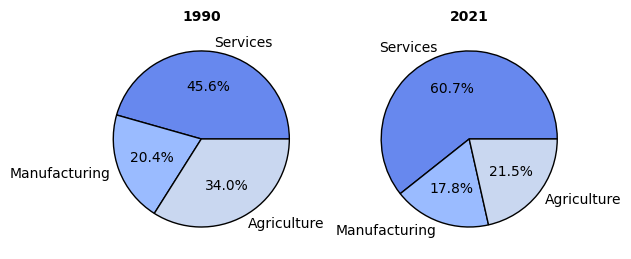

In [48]:
# Create the pie chart
fig, ax = plt.subplots(nrows=1, ncols=2)
ax[0].pie(filtered_data_4['1990'], labels=filtered_data_4['Indicator_Name'], autopct='%1.1f%%',wedgeprops={ 'edgecolor': 'black'})
ax[1].pie(filtered_data_4['2021'], labels=filtered_data_4['Indicator_Name'], autopct='%1.1f%%',wedgeprops={ 'edgecolor': 'black'})

# Add a title
ax[0].set_title('1990', fontsize=10, fontweight='bold')
ax[1].set_title('2021', fontsize=10, fontweight='bold')

# Set the color palette
sns.set_palette('coolwarm')

# Add spacing between the subplots
fig.tight_layout()

# Display the plot and download file
plt.show()
#plt.savefig('sectors.png')
#files.download("sectors.png") 


##  India’s Gross Fixed Capital Formation (GFCF) % to GDP in comparison with the major economies

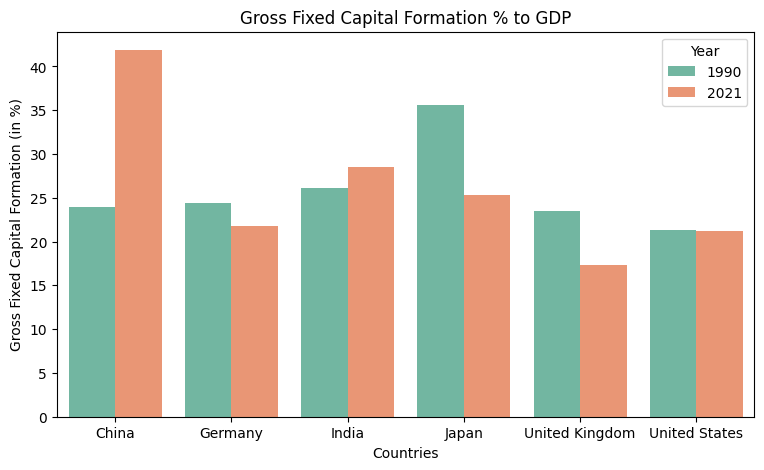

In [46]:
# Create a filtered DataFrame containing only the data for years 1990 and 2021
filtered_data_GFCF = world_economy4[(world_economy4['Year'] == '1990') |(world_economy4['Year'] == '2021')]

# Create the bar plot using the filtered DataFrame
fig, ax = plt.subplots(figsize = (9, 5))
sns.barplot(data = filtered_data_GFCF, x = 'Country_Name', 
            y = 'Gross fixed capital formation (% of GDP)', hue = 'Year',palette = "Set2")

# Add title and axis labels
ax.set(xlabel='Countries', ylabel='Gross Fixed Capital Formation (in %)',
       title='Gross Fixed Capital Formation % to GDP')
plt.show()
#plt.savefig("FDI.png")

# Download the file
#from google.colab import files
#files.download("FDI.png")


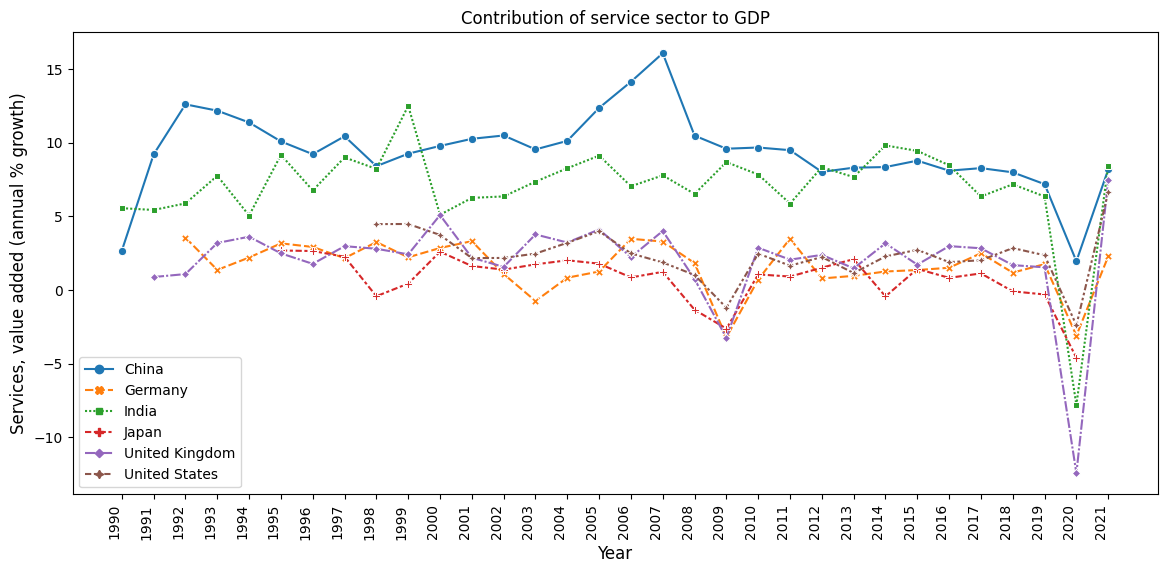

<Figure size 640x480 with 0 Axes>

In [ ]:
# Create line plot
plt.figure(figsize=(14,6))
sns.lineplot(data = world_economy4, x ='Year', y = 'Services, value added (annual % growth)',hue = 'Country_Name', style = 'Country_Name', markers = True, errorbar = None, palette = 'tab10') 
plt.xticks(rotation= 90, ha='right', fontsize=10)

# Add title and axis labels
plt.title("Contribution of service sector to GDP", fontsize = 12)
plt.ylabel('Services, value added (annual % growth)', fontsize = 12)
plt.xlabel("Year",fontsize = 12)
plt.legend(loc='lower left')

# Show plot
plt.show()
plt.savefig('services.png')




## Contribution (%) of Exports and Imports on countries’ GDP year on year basis?

### Trend of Exports and Imports (% of GDP)

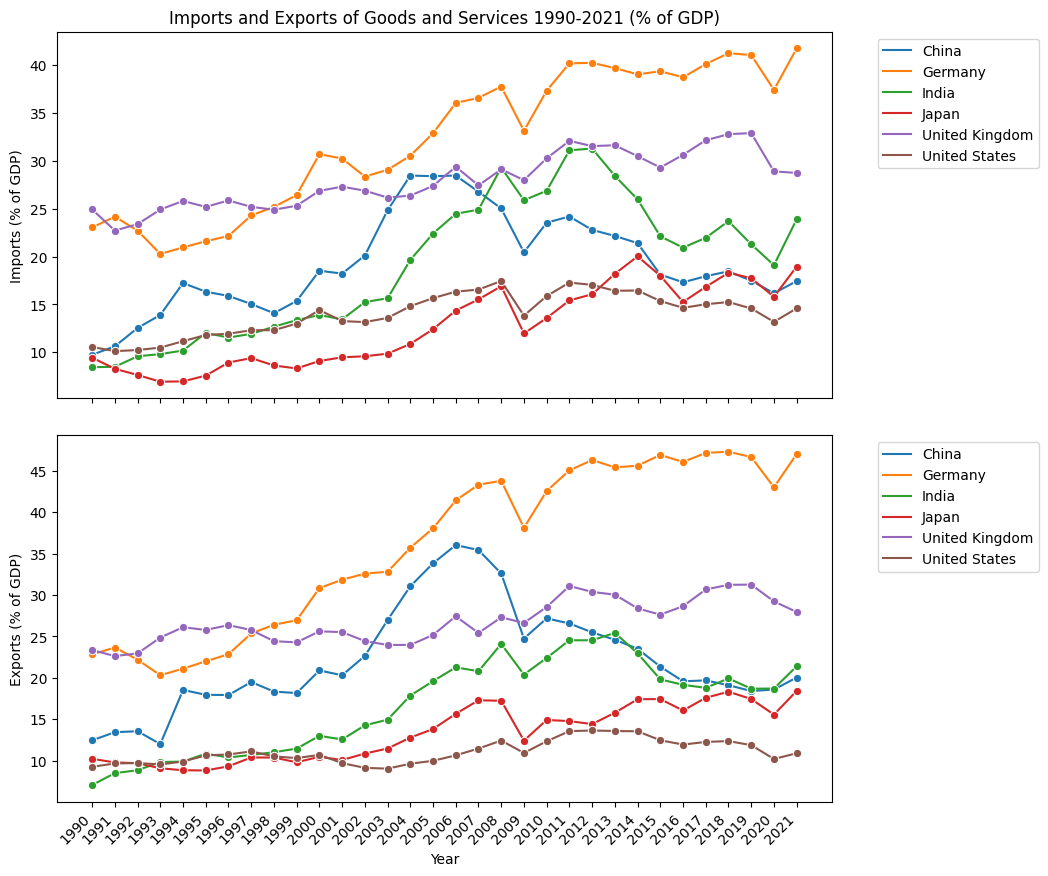

<Figure size 640x480 with 0 Axes>

In [ ]:
# create subplots
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(10, 10))

# plot line plot 1 on ax1
sns.lineplot(x="Year", y="Imports of goods and services (% of GDP)", hue="Country_Name",
             data=world_economy4, marker='o', ax=ax1)
ax1.set_ylabel('Imports (% of GDP)')
ax1.set_title('Imports and Exports of Goods and Services 1990-2021 (% of GDP)')
ax1.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# plot line plot 2 on ax2
sns.lineplot(x="Year", y="Exports of goods and services (% of GDP)", hue="Country_Name",
             data=world_economy4, marker='o', ax=ax2)
ax2.set_ylabel('Exports (% of GDP)')
ax2.set_xlabel('Year')
ax2.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

# adjust spacing between the subplots
fig.subplots_adjust(hspace=0.1)
plt.xticks(rotation= 45, ha='right', fontsize=10)

# show the plot
plt.show()
plt.savefig('Imports_Exports.png')
#files.download("Imports_Exports.png") 


### Interactive trend of Exports and Imports (% of GDP)

In [ ]:

# Set the ggplot2 theme
pio.templates.default = "seaborn"
imports = px.line(world_economy4, x="Year", y="Imports of goods and services (% of GDP)",
              title='Imports of goods and services 1990-2021 (% of GDP)', color = "Country_Name" )

imports.update_xaxes(rangeslider_visible=True)
# Change the x and y axis labels
imports.update_xaxes(title_text="Year")
imports.update_yaxes(title_text="Imports (% of GDP)")
#imports.update_layout(yaxis_tickformat="00.000%")
imports.update_layout(xaxis_tickangle=-45,
                      plot_bgcolor="floralwhite",
    paper_bgcolor="white",
    xaxis=dict(linecolor='grey', linewidth=1),
    yaxis=dict(linecolor='grey', linewidth=1)                      
)

imports.show()

In [ ]:

# Set the ggplot2 theme
pio.templates.default = "seaborn"
imports = px.line(world_economy4, x="Year", y="Exports of goods and services (% of GDP)",
              title='Exports of goods and services 1990-2021 (% of GDP)', color = "Country_Name" )

imports.update_xaxes(rangeslider_visible=True)
# Change the x and y axis labels
imports.update_xaxes(title_text="Year")
imports.update_yaxes(title_text="Exports (% of GDP)")
#imports.update_layout(yaxis_tickformat="00.000%")
imports.update_layout(xaxis_tickangle=-45,
                      plot_bgcolor="floralwhite",
    paper_bgcolor="white",
    xaxis=dict(linecolor='grey', linewidth=1),
    yaxis=dict(linecolor='grey', linewidth=1)                      
)

imports.show()

## Comparison of Exports and Imports of goods and services (% of GDP) for India and UK

In [ ]:
# selecting rows based on condition 
uk_ind_filter = ['India', 'United Kingdom']
year_filter =  ['1990', '1995', '2000', '2005', '2010', '2015', '2020']
ind_uk_data = world_economy4[(world_economy4['Year'].isin(year_filter)) &
                            ( world_economy4['Country_Name'].isin(uk_ind_filter))] 

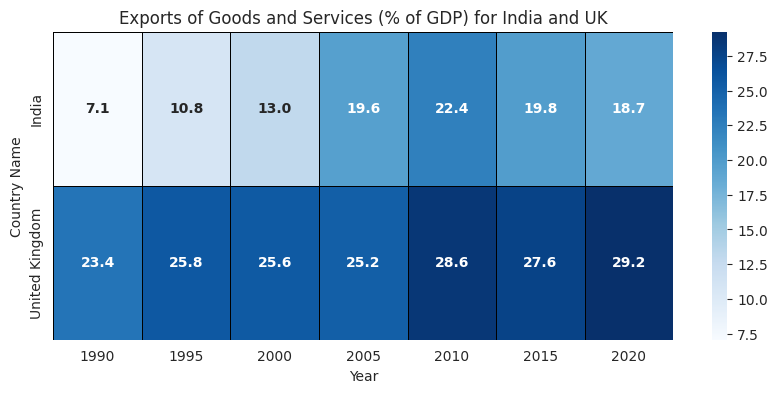

In [ ]:
ind_uk_data_plot = ind_uk_data.pivot_table(index='Country_Name',columns='Year',
                             values='Exports of goods and services (% of GDP)')

sns.set_style("white")
plt.figure(figsize =(10,4))
sns.heatmap(ind_uk_data_plot, annot= True,
            fmt = '.1f', annot_kws=dict(size = 10, weight = 'bold'), linewidths=0.5, linecolor = 'black',
            cmap= "Blues")
plt.title("Exports of Goods and Services (% of GDP) for India and UK")
plt.ylabel("Country Name")
plt.show()


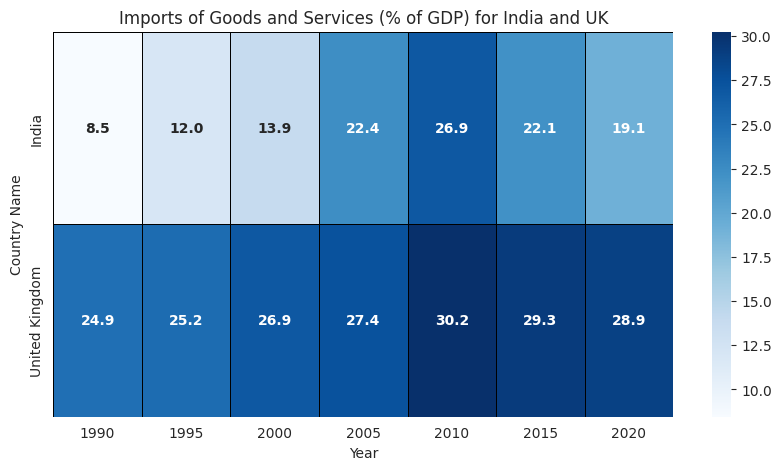

In [ ]:
ind_uk_data_plot_2 = ind_uk_data.pivot_table(index='Country_Name',columns='Year',
                             values='Imports of goods and services (% of GDP)')

sns.set_style("white")
plt.figure(figsize =(10,5))
sns.heatmap(ind_uk_data_plot_2, annot= True,
            fmt = '.1f', annot_kws=dict(size = 10, weight = 'bold'), linewidths=0.5, linecolor = 'black',
            cmap= "Blues")
plt.title("Imports of Goods and Services (% of GDP) for India and UK")
plt.ylabel("Country Name")

plt.show()


## Pattern of value added by Industry (including construction)

In [ ]:
world_economy4['Year'] = world_economy4['Year'].astype(int)
industry_year_filter =  range(2000,2021,1)
industry_data = world_economy4[(world_economy4['Year'].isin(industry_year_filter))] 

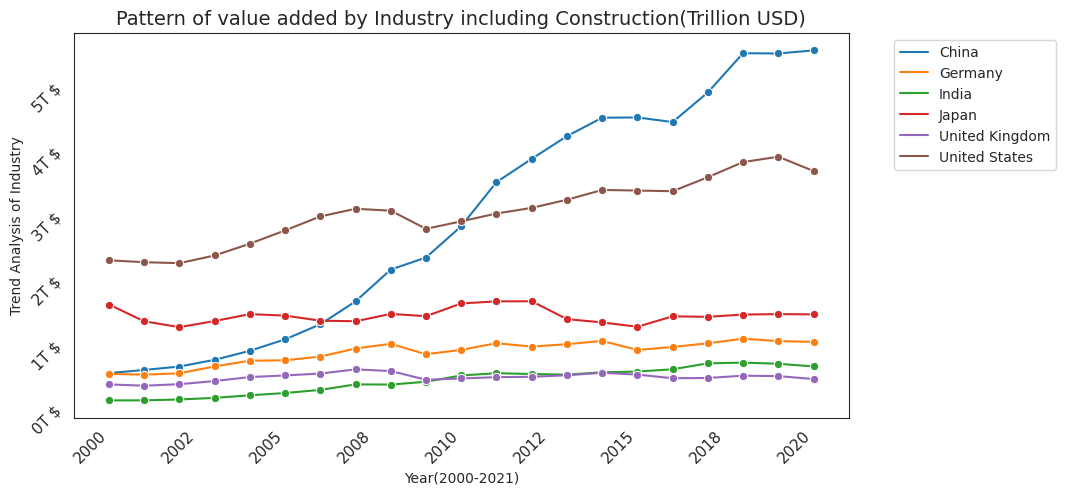

In [ ]:
# selecting rows based on condition 


plt.figure(figsize=(10,5))
industry_plot = sns.lineplot( x = "Year" ,y = "Industry (including construction), value added (current US$)",
                data = industry_data, hue ="Country_Name", marker = 'o'
                )
#pd.melt(df, 'Day')
plt.xticks(rotation= 45, ha='right', fontsize=11)
plt.yticks(rotation= 45, ha='right', fontsize=11)
industry_plot.set(xlabel="Year(2000-2021)",ylabel="Trend Analysis of Industry")
industry_plot.xaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}'.format(x)))
industry_plot.set_title('Pattern of value added by Industry including Construction(Trillion USD)', fontsize=14)
industry_plot.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:.0f}T $'.format(x/1e12)))
industry_plot.yaxis.offsetText.set_visible(False)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
